# Plot stats of the band flags

Plot a histogram for some key g and k bands as a function of PanSTARRS g magnitude

In [110]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib as mpl
mpl.use('pdf')
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import LogLocator

import pyvo as vo
import time
from astropy.table import Table, Column
import numpy as np

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [111]:
service = vo.dal.TAPService(
    "https://herschel-vos.phys.sussex.ac.uk/__system__/tap/run/tap"
)

In [112]:
flag_query="""SELECT
m_gpc1_g,
flag_mmt_g, 
flag_omegacam_g, 
flag_suprime_g, 
flag_megacam_g, 
flag_wfc_g, 
flag_gpc1_g, 
flag_decam_g, 
flag_90prime_g, 
flag_sdss_g,
flag_isaac_k, 
flag_moircs_k, 
flag_ukidss_k, 
flag_newfirm_k, 
flag_wircs_k, 
flag_hawki_k,
flag_wircam_ks, 
flag_vista_ks, 
flag_moircs_ks, 
flag_omega2000_ks, 
flag_tifkam_ks
FROM herschelhelp.main
WHERE m_gpc1_g IS NOT NULL"""

In [113]:
job = service.submit_job(flag_query)
job.run()
job_url = job.url
job_result = vo.dal.tap.AsyncTAPJob(job_url)
start_time = time.time()
wait = 5.
while job.phase == 'EXECUTING':
    
    time.sleep(wait) #wait and try again
    #wait *= 2

print('Job {} after {} seconds.'.format(job.phase, round(time.time() - start_time)))

result = job_result.fetch_result()
flags = result.table

Job COMPLETED after 591 seconds.


KeyboardInterrupt: 

In [ ]:
flags.write('./data/flags.fits', overwrite=True)

In [114]:
flags = Table.read('./data/flags.fits')

In [115]:
len(flags)

16473810

In [116]:
flags[:10].show_in_notebook()

In [117]:
np.unique(flags['flag_mmt_g'])

<Column name='flag_mmt_g' dtype='bool' description='Flag set to true for sources for which niether the mmt_g aperture nor total flux should be used for SED fitting (see documentation).' length=2>
False
 True

In [118]:
bins = np.linspace(10, 30, 100)

In [119]:
flag_cols = [
    "flag_mmt_g", 
    "flag_omegacam_g", 
    "flag_suprime_g", 
    "flag_megacam_g", 
    "flag_wfc_g", 
    "flag_gpc1_g", 
    "flag_decam_g", 
    "flag_90prime_g", 
    "flag_sdss_g",
    "flag_isaac_k", 
    "flag_moircs_k", 
    "flag_ukidss_k", 
    "flag_newfirm_k", 
    "flag_wircs_k", 
    "flag_hawki_k",
    "flag_wircam_ks", 
    "flag_vista_ks", 
    "flag_moircs_ks", 
    "flag_omega2000_ks", 
    "flag_tifkam_ks"
]

In [120]:
def make_flag_counts(table, bins, flag_col):
    frac = np.full(len(bins)-1, np.nan)
    for n, b in enumerate(bins[:-1]):
        mask = table['m_gpc1_g'] > bins[n]
        mask &= table['m_gpc1_g'] < bins[n+1]
        flagged = np.sum(table[mask][flag_col])
        not_flagged = np.sum(~table[mask][flag_col])
        frac[n] = flagged/not_flagged
    return frac
        

In [121]:
flag_counts = {}
for col in flag_cols:
    print("{} total: {}, True: {}, False: {}".format(
        col,
        np.sum(~flags[col].mask), 
        np.sum(flags[col]), 
        np.sum(~flags[col])
    ))
    flag_counts.update({col: make_flag_counts(flags, bins, col)})

AttributeError: 'Column' object has no attribute 'mask'

In [ ]:
fig, ax = plt.subplots()

ax.plot(bins[:-1]+(bins[1] - bins[0])/2, flag_counts['flag_gpc1_g'], label=f)
    
#ax.legend()
#ax.set_xscale([15,26])
#ax.set_yscale(0,1)
    

In [124]:
gpc_query="""SELECT
m_gpc1_g,
flag_gpc1_g, 
m_gpc1_r,
flag_gpc1_r, 
m_gpc1_i,
flag_gpc1_i, 
m_gpc1_z,
flag_gpc1_z, 
m_gpc1_y,
flag_gpc1_y
FROM herschelhelp.main
WHERE m_gpc1_g IS NOT NULL
OR m_gpc1_r IS NOT NULL
OR m_gpc1_i IS NOT NULL
OR m_gpc1_z IS NOT NULL
OR m_gpc1_y IS NOT NULL
"""

In [125]:
job = service.submit_job(gpc_query)
job.run()
job_url = job.url
job_result = vo.dal.tap.AsyncTAPJob(job_url)
start_time = time.time()
wait = 5.
while job.phase == 'EXECUTING':
    
    time.sleep(wait) #wait and try again
    #wait *= 2

print('Job {} after {} seconds.'.format(job.phase, round(time.time() - start_time)))

result = job_result.fetch_result()
gpcflags = result.table

Job COMPLETED after 592 seconds.


In [126]:
gpcflags.write('./data/gpcflags.fits', overwrite=True)

In [127]:
gpc_counts = {}
for col in ['g','r','i','z','y']:
    col = "flag_gpc1_{}".format(col)
    print("{} total: {}, True: {}, False: {}".format(
        col,
        np.sum(~gpcflags[col].mask), 
        np.sum(gpcflags[col]), 
        np.sum(~gpcflags[col])
    ))
    gpc_counts.update({col: make_flag_counts(gpcflags, bins, col)})

flag_gpc1_g total: 17754704, True: 12682, False: 17742022


/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


flag_gpc1_r total: 17754704, True: 17004, False: 17737700
flag_gpc1_i total: 17754704, True: 16475, False: 17738229
flag_gpc1_z total: 17754704, True: 14029, False: 17740675
flag_gpc1_y total: 17754704, True: 6485, False: 17748219


In [128]:
17004 + 16475 + 14029 + 6485

53993

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


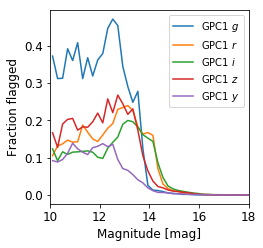

In [129]:
fig, ax = plt.subplots()

ax.plot(bins[:-1]+(bins[1] - bins[0])/2, gpc_counts['flag_gpc1_g'], label='GPC1 $g$')
ax.plot(bins[:-1]+(bins[1] - bins[0])/2, gpc_counts['flag_gpc1_r'], label='GPC1 $r$')
ax.plot(bins[:-1]+(bins[1] - bins[0])/2, gpc_counts['flag_gpc1_i'], label='GPC1 $i$')
ax.plot(bins[:-1]+(bins[1] - bins[0])/2, gpc_counts['flag_gpc1_z'], label='GPC1 $z$')
ax.plot(bins[:-1]+(bins[1] - bins[0])/2, gpc_counts['flag_gpc1_y'], label='GPC1 $y$')

ax.set_xlim(10,18)
ax.set_xlabel("Magnitude [mag]")
ax.set_ylabel("Fraction flagged")
legend = ax.legend( markerscale=2)

plt.rc('font', family='serif', serif='Times')
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1.0 * column_width_cm
hieght_cm = width_cm / 1.0
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.savefig('./figs/flags.pdf', bbox_inches='tight')
plt.savefig('./figs/flags.png', bbox_inches='tight')

## Stellarity of GAIA objects

In [80]:
star_query="""SELECT 
m_gpc1_g, 
stellarity
FROM herschelhelp.main
WHERE herschelhelp.main.flag_gaia=3
AND m_gpc1_g IS NOT NULL 
"""

In [81]:
job = service.submit_job(star_query)
job.run()
job_url = job.url
job_result = vo.dal.tap.AsyncTAPJob(job_url)
start_time = time.time()
wait = 5.
while job.phase == 'EXECUTING':
    
    time.sleep(wait) #wait and try again
    #wait *= 2

print('Job {} after {} seconds.'.format(job.phase, round(time.time() - start_time)))

result = job_result.fetch_result()
star_tab = result.table

Job COMPLETED after 455 seconds.


In [82]:
len(star_tab)

2673020

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


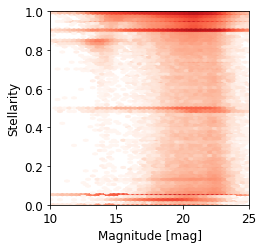

In [83]:
fig, ax = plt.subplots()
#ax.scatter(star_tab['m_gpc1_g'], star_tab['stellarity'], s=0.1)
ax.hexbin(star_tab['m_gpc1_g'], star_tab['stellarity'], cmap='Reds', bins="log", mincnt=1)#gridsize=200,
           
ax.set_xlim(10,25)
ax.set_ylim(0,1)
ax.set_xlabel("Magnitude [mag]")
ax.set_ylabel("Stellarity")
#legend = ax.legend( markerscale=2)

plt.rc('font', family='serif', serif='Times')
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1.0 * column_width_cm
hieght_cm = width_cm / 1.0
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.savefig('./figs/stellarity.pdf', bbox_inches='tight')
plt.savefig('./figs/stellarity.png', bbox_inches='tight')

(array([1.392200e+04, 5.900000e+01, 1.520000e+02, 6.400000e+01,
        1.181000e+03, 8.638000e+03, 5.531000e+03, 3.260000e+02,
        8.240000e+02, 1.630000e+02, 9.327100e+04, 5.190000e+02,
        1.214000e+03, 4.390000e+02, 9.510000e+02, 3.450000e+02,
        8.540000e+02, 3.190000e+02, 8.240000e+02, 2.440000e+02,
        6.810000e+02, 2.500000e+02, 6.660000e+02, 2.770000e+02,
        7.810000e+02, 2.280000e+02, 1.247000e+03, 2.190000e+02,
        7.570000e+02, 1.950000e+02, 6.560000e+02, 1.680000e+02,
        6.020000e+02, 1.590000e+02, 5.240000e+02, 1.740000e+02,
        5.350000e+02, 1.420000e+02, 4.890000e+02, 1.410000e+02,
        4.140000e+02, 1.120000e+02, 4.140000e+02, 1.120000e+02,
        4.140000e+02, 1.330000e+02, 3.830000e+02, 1.050000e+02,
        3.760000e+02, 8.700000e+01, 3.580000e+02, 9.800000e+01,
        3.310000e+02, 1.030000e+02, 3.230000e+02, 7.200000e+01,
        3.530000e+02, 8.700000e+01, 3.270000e+02, 8.500000e+01,
        3.210000e+02, 8.400000e+01, 3.35

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


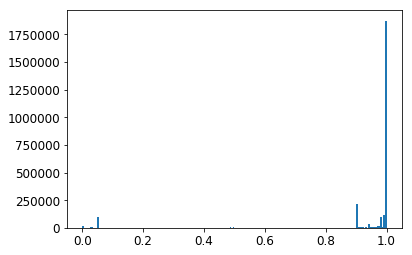

In [88]:
plt.hist(star_tab[~np.isnan(star_tab['stellarity'] )]['stellarity'], bins=200)

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


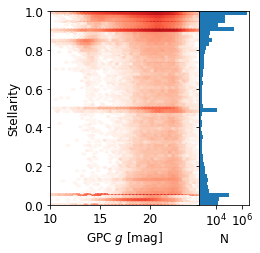

In [108]:
fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
fig.subplots_adjust(hspace=0, wspace=0)

ax1.hexbin(star_tab['m_gpc1_g'], star_tab['stellarity'], cmap='Reds', bins="log", mincnt=1)#gridsize=200,
           
ax1.set_xlim(10,25)
ax1.set_ylim(0,1)
ax1.set_xlabel("GPC $g$ [mag]")
ax1.set_ylabel("Stellarity")
ax1.set_xticks([10,15,20])
ax1.set_xticklabels([10,15,20])
#legend = ax.legend( markerscale=2)

ax2.hist(star_tab[~np.isnan(star_tab['stellarity'] )]['stellarity'], bins=50, orientation="horizontal")
ax2.set_yticklabels([])
ax2.set_ylim(0,1)


ax2.set_xlabel("N")
ax2.set_xscale('log')

#ax2.set_xticks([0,1000000,2000000])
#ax2.set_xticklabels([0,'','2m'])
#ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.rc('font', family='serif', serif='Times')
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1.0 * column_width_cm
hieght_cm = width_cm / 1.0
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.savefig('./figs/stellarity.pdf', bbox_inches='tight')
plt.savefig('./figs/stellarity.png', bbox_inches='tight')

## flag_merged stats mags

In [45]:
merged_query="""SELECT TOP 1000000
m_mmt_g, 
m_omegacam_g, 
m_suprime_g, 
m_megacam_g, 
m_wfc_g, 
m_gpc1_g, 
m_decam_g, 
m_90prime_g, 
m_sdss_g, 
m_isaac_k, 
m_moircs_k, 
m_ukidss_k, 
m_newfirm_k, 
m_wircs_k, 
m_hawki_k,
m_wircam_ks, 
m_vista_ks, 
m_moircs_ks, 
m_omega2000_ks, 
m_tifkam_ks,
ra,
dec
FROM herschelhelp.main
WHERE herschelhelp.main.flag_merged='true'
AND NOT herschelhelp.main.field='XMM-LSS'
AND m_suprime_g IS NOT NULL
"""

In [46]:
job = service.submit_job(merged_query)
job.run()
job_url = job.url
job_result = vo.dal.tap.AsyncTAPJob(job_url)
start_time = time.time()
wait = 5.
print(job.phase)
while (job.phase == 'EXECUTING') or (job.phase == 'QUEUED'):
    
    time.sleep(wait) #wait and try again
    #wait *= 2

print('Job {} after {} seconds.'.format(job.phase, round(time.time() - start_time)))

result = job_result.fetch_result()
merged_tab = result.table

EXECUTING
Job COMPLETED after 562 seconds.


In [47]:
len(merged_tab)

380940

In [48]:
merged_tab.sort(['ra', 'dec'])

In [49]:
merged_tab[-10:].show_in_notebook()

In [50]:
only_suprime = ~np.isnan(merged_tab['m_suprime_g'])

for band in [
    'm_mmt_g', 
    'm_omegacam_g', 
    #'m_suprime_g, 
    'm_megacam_g', 
    'm_wfc_g', 
    'm_gpc1_g', 
    'm_decam_g', 
    'm_90prime_g', 
    'm_sdss_g']:
    only_suprime &= merged_tab[band].mask

In [51]:
frac_unmatched = np.full(len(bins)-1, np.nan)
for n, b in enumerate(bins[:-1]):
    mask = merged_tab['m_suprime_g'] > bins[n]
    mask &= merged_tab['m_suprime_g'] < bins[n+1]
    frac_unmatched[n] = np.sum(mask & only_suprime)/np.sum(mask)

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in long_scalars


/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


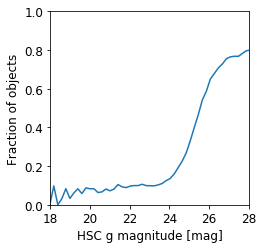

In [53]:
fig, ax = plt.subplots()

ax.plot(bins[:-1]+(bins[1] - bins[0])/2, frac_unmatched)

ax.set_xlim(18,28)
ax.set_ylim(0,1)
ax.set_xlabel("HSC g magnitude [mag]")
ax.set_ylabel("Fraction of objects")
legend = ax.legend( markerscale=2)

plt.rc('font', family='serif', serif='Times')
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1.0 * column_width_cm
hieght_cm = width_cm / 1.0
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.savefig('./figs/merged_unmatched.pdf', bbox_inches='tight')
plt.savefig('./figs/merged_unmatched.png', bbox_inches='tight')

In [24]:
for band in [
    'm_mmt_g', 
    'm_omegacam_g', 
    #'m_suprime_g, 
    'm_megacam_g', 
    'm_wfc_g', 
    'm_gpc1_g', 
    'm_decam_g', 
    'm_90prime_g', 
    'm_sdss_g']:
    merged_tab[band].fill_value = np.nan
merged_tab = merged_tab.filled()

In [20]:
np.sum(only_suprime)

142347

In [38]:
merged_tab.add_column(Column(
    data= np.nanstd(np.array([ 
        merged_tab['m_mmt_g'].data,  
        merged_tab['m_omegacam_g'].data,  
        merged_tab['m_suprime_g'].data, 
        merged_tab['m_megacam_g'].data,  
        merged_tab['m_wfc_g'].data,  
        merged_tab['m_gpc1_g'].data,  
        merged_tab['m_decam_g'].data,  
        merged_tab['m_90prime_g'].data,  
        merged_tab['m_sdss_g'].data
    ]), axis=0 ) ,
                             
    name='std'
))

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1426: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')


In [39]:
merged_tab[-10:].show_in_notebook()